**Ein Beispiel für das Transportproblem**

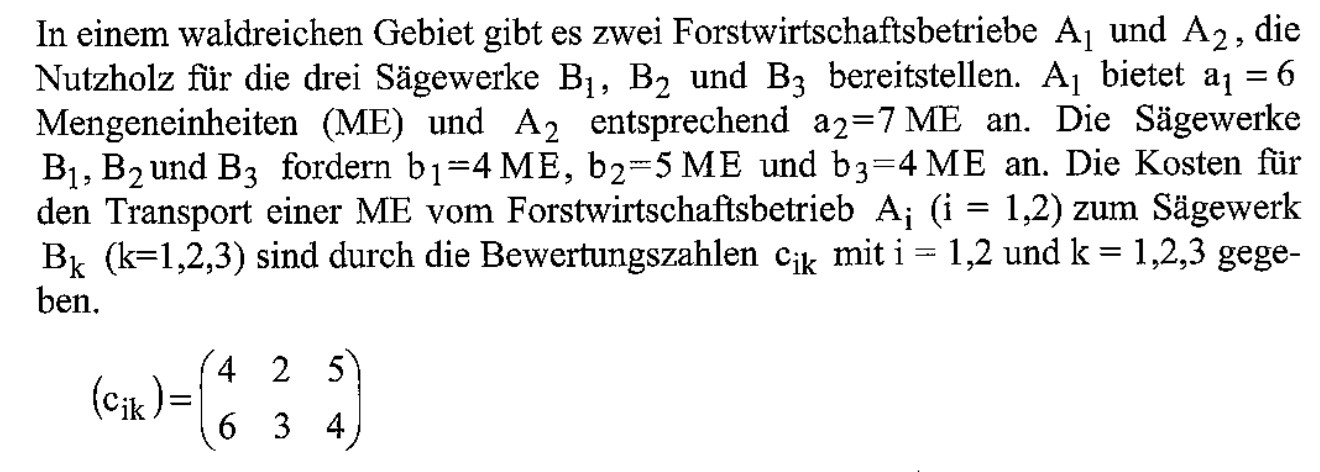

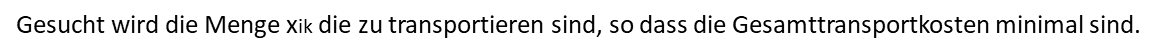

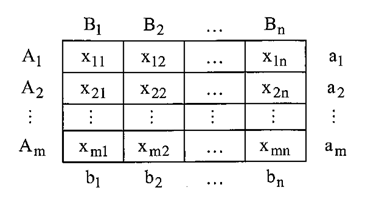

Wir besorgen uns pulp als linearen Solver, denn der ist frei verfügbar und braucht keine Lizenz

In [9]:
from pulp import *

#solver_list = listSolvers(onlyAvailable=True)
#print(solver_list)

Die Erstellung des Problems 

Fügen Sie weitere Stationen hinzu und testen Sie, wie sich die Rechnezeit verhält. Wie verhält es sich mit diesem Datensatz?
<p>

Angebotsstellen (Origin)

|  Label    | Menge |
|-----------| ------|
|  O1       |  6    |
|  O2       |  7    |

Nachfragestellen (Demand)

|  Label    | Menge |
|-----------| ------|
|  D1       |  4   |
|  D2       |  5   |
|  D3       |  4   |




Bitte erstellen Sie die Angebots- und Nachfragestellen

In [10]:
O1 = 6
O2 = 7

D1 = 4
D2 = 5
D3 = 4


Die Kosten werden in zwei Teillisten eingegeben: die erste enthält die Kosten für den Versand aus Lager O1 und die zweite die Kosten für den Versand aus Lager O2. 

| Nach / von | O1    | O2    |
|---         |-------| ------|
| D1         | 4     |  6    |
| D2         | 2     |  3    |
| D3         | 5     |  4    |


Bitte stellen Sie die Kostenmatrix auf.

In [11]:
co1d1 = 4
co1d2 = 2
co1d3 = 5
#...

co2d1 = 6
co2d2 = 3
co2d3 = 4
#...

Die Varialben für die Menge an verschifften Material müssen angelegt werden:

In [12]:
xo1d1 = LpVariable('xo1d1', lowBound=0, cat=LpInteger)
xo1d2 = LpVariable('xo1d2', lowBound=0, cat=LpInteger)
xo1d3 = LpVariable('xo1d3', lowBound=0, cat=LpInteger)
xo2d1 = LpVariable('xo2d1', lowBound=0, cat=LpInteger)
xo2d2 = LpVariable('xo2d2', lowBound=0, cat=LpInteger)
xo2d3 = LpVariable('xo2d3', lowBound=0, cat=LpInteger)

Das mathemaische Modell wird als lineares Problem definiert, welches es zu minimieren gilt:

In [13]:
#The prob variable is created using the LpProblem function, with the usual input parameters.
transport_model = LpProblem("Transport_Model", LpMinimize)

Die Zielfunktion wird der Variable *transport_model* mit Hilfe einer Liste hinzugefügt. Die Bedeutung der Zeilfunktion kann als Summe der Kosten multipliziert mit der Menge für jede mögliche Kombination betrachtet werden. 

$$
min \sum\limits_{d∈D,o∈O} c(d,o)x(d,o)
$$

In [14]:
# The objective function is added to 'transport_model' first
transport_model += co1d1 *xo1d1 + co1d2*xo1d2 + co1d3*xo1d3 + co2d1*xo2d1 + co2d2 * xo2d2 + co2d3 * xo2d3 ,"Z"

Angebotseinschränkungen: Für jeden Ursprung (Origin) werden die Werte der Entscheidungsvariablen (Menge der Transporte) für jeden der Bestimmungsorte (Destination) summiert und dann so eingeschränkt, dass sie kleiner oder gleich dem Angebotsmaximum für diesen Ursprung sind.<p> 
Nachfragebeschränkungen: Für jeden Bestimmungsort werden die Werte der Entscheidungsvariablen von jedem der Ursprünge summiert und dann darauf beschränkt, größer oder gleich dem Nachfrageminimum zu sein.

Exemplarisch für D gilt:
$$
\sum\limits_{o∈O} x(o,d)>=supply_o…∀d∈D
$$

So gilt für O:
$$
\sum\limits_{d∈D} x(o,d)>=demand_d…∀o∈O
$$

In [15]:
transport_model += xo1d1 + xo1d2 + xo1d3 <= O1
transport_model += xo2d1 + xo2d2 + xo2d3 <= O2

transport_model += xo1d1 + xo2d1 >= D1
transport_model += xo1d2 + xo2d2 >= D2
transport_model += xo1d3 + xo2d3 >= D3

Die mathematischen Gleichungen sind hier einmal aufgeschlüsselt und die Abbildung zeigt, Wie das ganze dann ausgeschrieben aussieht:

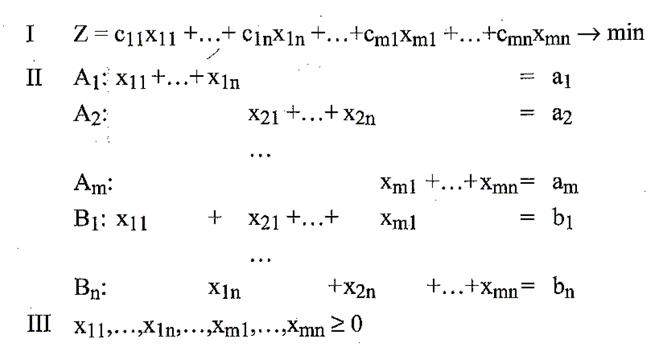

Jetzt das Modell noch lösen, den Status und die Lösung ausgeben 

In [16]:
                   
# The problem data is written to an .lp file
#transport_model.writeLP("BeerDistributionProblem.lp")
# The optimised objective function value is printed to the screen    
print(transport_model)

# The problem is solved using PuLP's choice of Solver
transport_model.solve()

# The status of the solution is printed to the screen
print ("Status:", LpStatus[transport_model.status])

# Each of the variables is printed with it's resolved optimum value
for v in transport_model.variables():
    print (v.name, "=", v.varValue)
    
print ("Total Cost of Transportation = ", value(transport_model.objective))

Transport_Model:
MINIMIZE
4*xo1d1 + 2*xo1d2 + 5*xo1d3 + 6*xo2d1 + 3*xo2d2 + 4*xo2d3 + 0
SUBJECT TO
_C1: xo1d1 + xo1d2 + xo1d3 <= 6

_C2: xo2d1 + xo2d2 + xo2d3 <= 7

_C3: xo1d1 + xo2d1 >= 4

_C4: xo1d2 + xo2d2 >= 5

_C5: xo1d3 + xo2d3 >= 4

VARIABLES
0 <= xo1d1 Integer
0 <= xo1d2 Integer
0 <= xo1d3 Integer
0 <= xo2d1 Integer
0 <= xo2d2 Integer
0 <= xo2d3 Integer

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/ridwan/Desktop/PROJECTS/LEUPHANA/ASCM-ws2526-Gruppe-1/.venv/lib/python3.13/site-packages/pulp/apis/../solverdir/cbc/linux/i64/cbc /tmp/0e802ff3ea354c12b5fd5cc6fd29fcff-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /tmp/0e802ff3ea354c12b5fd5cc6fd29fcff-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 10 COLUMNS
At line 41 RHS
At line 47 BOUNDS
At line 54 ENDATA
Problem MODEL has 5 rows, 6 columns and 12 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cp